In [5]:
# Dataset:
import numpy as np
import pandas as pd
import scipy 
# 15 samples:
# 10 first exposed
exposed = np.array([1] * 10 + [0] * 10)
# 8 first with cancer, 10 without, the last two with.
cancer = np.array([1] * 8 + [0] * 10 + [1] * 2)
crosstab = pd.crosstab(exposed, cancer, rownames=['exposed'],
colnames=['cancer'])
print("Observed table:")
print("---------------")
print(crosstab)
chi2, pval, dof, expected = scipy.stats.chi2_contingency(crosstab)
print("Statistics:")
print("-----------")
print("Chi2 = %f, pval = %f" % (chi2, pval))
print("Expected table:")
print("---------------")
print(expected)

Observed table:
---------------
cancer   0  1
exposed      
0        8  2
1        2  8
Statistics:
-----------
Chi2 = 5.000000, pval = 0.025347
Expected table:
---------------
[[5. 5.]
 [5. 5.]]


In [6]:
# Compute expected cross-table based on proportion
exposed_marg = crosstab.sum(axis=0)
exposed_freq = exposed_marg / exposed_marg.sum()
cancer_marg = crosstab.sum(axis=1)
cancer_freq = cancer_marg / cancer_marg.sum()
print('Exposed frequency? Yes: %.2f' % exposed_freq[0],
'No: %.2f' % exposed_freq[1])
print('Cancer frequency? Yes: %.2f' % cancer_freq[0],
'No: %.2f' % cancer_freq[1])
print('Expected frequencies:')
print(np.outer(exposed_freq, cancer_freq))
print('Expected cross-table (frequencies * N): ')
print(np.outer(exposed_freq, cancer_freq) * len(exposed))

Exposed frequency? Yes: 0.50 No: 0.50
Cancer frequency? Yes: 0.50 No: 0.50
Expected frequencies:
[[0.25 0.25]
 [0.25 0.25]]
Expected cross-table (frequencies * N): 
[[5. 5.]
 [5. 5.]]


Non-Parametric Spearman cor test, cor: 0.5122, pval: 0.0007
Parametric Pearson cor test: cor: 0.3085, pval: 0.0528


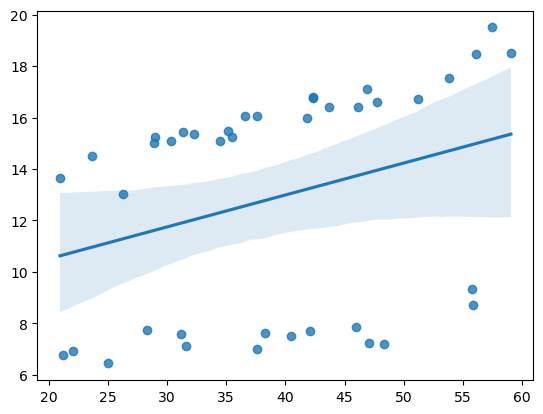

In [8]:
np.random.seed(3)
import seaborn as sns
# Age uniform distribution between 20 and 40
age = np.random.uniform(20, 60, 40)
# Systolic blood presure, 2 groups:
# - 15 subjects at 0.05 * age + 6
# - 25 subjects at 0.15 * age + 10
sbp = np.concatenate((0.05 * age[:15] + 6, 0.15 * age[15:] + 10)) + \
.5 * np.random.normal(size=40)
sns.regplot(x=age, y=sbp)
# Non-Parametric Spearman
cor, pval = scipy.stats.spearmanr(age, sbp)
print("Non-Parametric Spearman cor test, cor: %.4f, pval: %.4f" % (cor, pval))
# "Parametric Pearson cor test
cor, pval = scipy.stats.pearsonr(age, sbp)
print("Parametric Pearson cor test: cor: %.4f, pval: %.4f" % (cor, pval))

In [11]:
df = salary[salary.management == 'N'] 
# y, x = df.salary, df.experience
beta, beta0, r_value, p_value, std_err = scipy.stats.linregress(x,y)
print("y = %f x + %f, r: %f, r-squared: %f,\np-value: %f, std_err: %f"
% (beta, beta0, r_value, r_value**2, p_value, std_err))
print("Regression line with the scatterplot")
yhat = beta * x + beta0 # regression line
plt.plot(x, yhat, 'r-', x, y,'o')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()
print("Using seaborn")
ax = sns.regplot(x="experience", y="salary", data=df)


NameError: name 'salary' is not defined

In [13]:
import pandas as pd
number_of_flips = [1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10, 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20]
number_of_heads = [0 , 1 , 2 , 3 , 4 , 4 , 4 , 5 , 6 , 7,  8  ,  8 ,  9 , 10 , 10 , 10 , 10 , 10 , 10 , 11] 
proportion = [.00 , .50 , .67 , .75 , .80 , .67 , .57 , .63 , .67 , .70, .73 , .67 , .69 , .71 , .67 ,  .63 , .59 , .56 , .53 , .55]

df = pd.DataFrame(
    {'Number_of_flips': number_of_flips,
     'Number_of_heads': number_of_heads,
     'Proportion': proportion
    })

df

,Number_of_flips,Number_of_heads,Proportion
0,1,0,0.00
1,2,1,0.50
2,3,2,0.67
3,4,3,0.75
4,5,4,0.80
5,6,4,0.67
6,7,4,0.57
7,8,5,0.63
8,9,6,0.67
9,10,7,0.70


C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


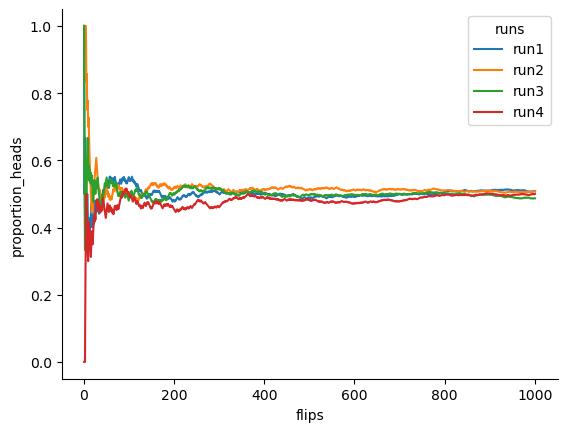

In [14]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def coin_flips(n):
    n = n
    heads = [random.uniform(0,1) for i in range(n)]
    heads = [1 if i > 0.5 else 0 for i in heads]
    flips = np.arange(1,n+1)
    proportion = (np.cumsum(heads)/flips)

    df = pd.DataFrame(
        {'flips': flips,
         'proportion_heads': proportion
        })

    #ax = sns. lineplot(x=df['flips'], y=df['proportion_heads'])
    return(df)

n = 1000

run1 = coin_flips(n)
run2 = coin_flips(n)
run3 = coin_flips(n)
run4 = coin_flips(n)


df = pd.concat([run1, run2, run3, run4], axis=0)

runs = ['run1']*n + ['run2']*n + ['run3']*n + ['run4']*1000

df['runs'] = runs


ax = sns.lineplot(data = df, x = 'flips', y = 'proportion_heads', hue = 'runs')

sns.despine()

#glue("frequentist_probability_fig", ax, display=False)

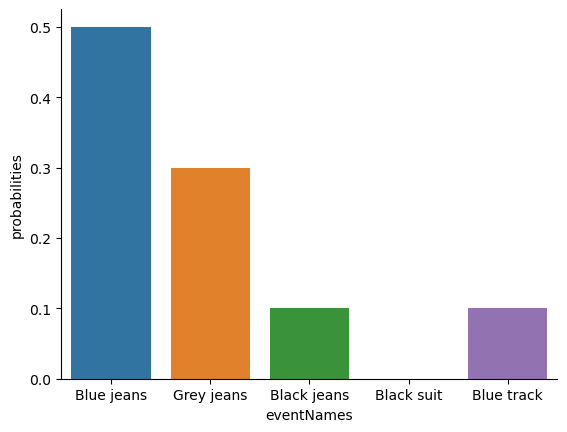

In [15]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(
    {'probabilities': [.5, .3, .1, 0, .1],
     'eventNames': ["Blue jeans", "Grey jeans", "Black jeans", "Black suit", "Blue track"],
    }) 

fig = sns.barplot(x='eventNames', y='probabilities', data=df)

sns.despine()

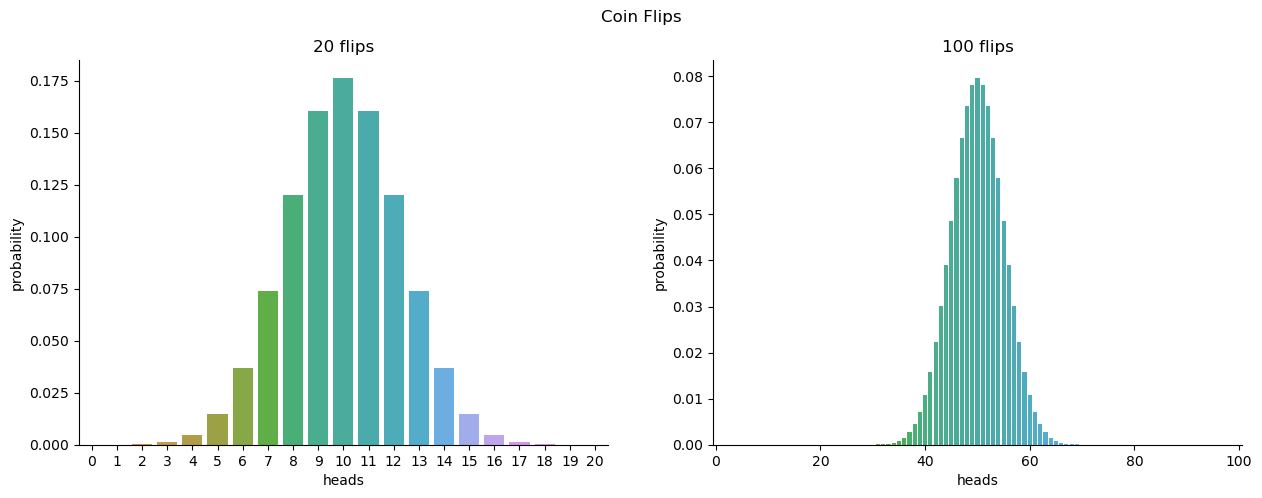

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt


from scipy.stats import binom

step = 1

n1 = 20
n2 = 100

r1 = list(range(0,21,step))
r2 = list(range(0,101,step))

p1 = 1/2
p2 = 1/2

y1 = binom.pmf(r1,n1,p1)
y2 = binom.pmf(r2,n2,p2)

df1 = pd.DataFrame(
    {'probability': y1,
     'heads': r1,
    }) 


df2 = pd.DataFrame(
    {'probability': y2,
     'heads': r2,
    }) 



fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Coin Flips')


axes[0].set_title('20 flips')
axes[1].set_title('100 flips')

ax1 = sns.barplot(x='heads', y='probability', data=df1, ax=axes[0])
ax2 = sns.barplot(x='heads', y='probability', data=df2, ax=axes[1])

ax2.set_xticks([0, 20, 40, 60,80, 100])

sns.despine()

C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


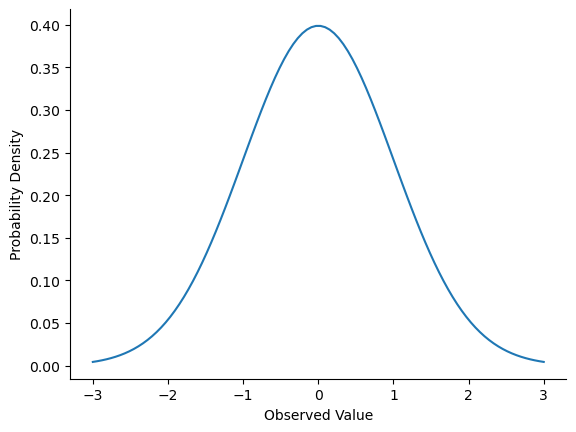

In [17]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

fig = sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma))
plt.xlabel('Observed Value')
plt.ylabel('Probability Density')

sns.despine()

C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

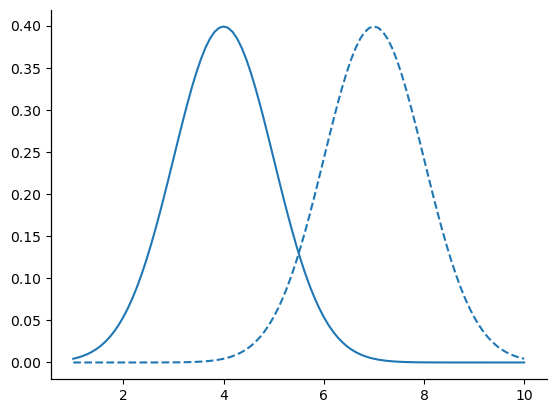

In [18]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns


mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(1, 10, 100)
y1 = stats.norm.pdf(x, 4, sigma)
y2 = stats.norm.pdf(x, 7, sigma)


fig = sns.lineplot(x = x, y = y1)
ax2=fig.twinx()
ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)



sns.lineplot(x = x, y = y2, ax=ax2, linestyle='--')
sns.despine()

C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

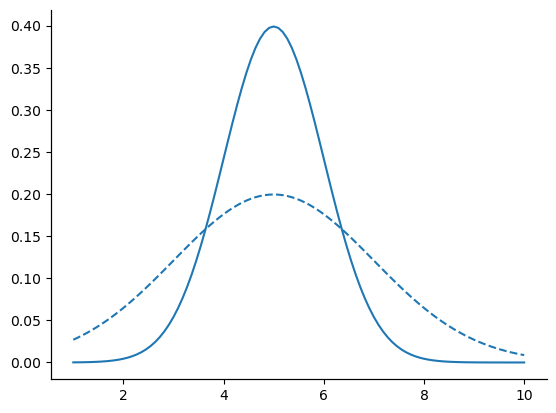

In [19]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns


mu = 5

variance = 1
sigma = np.sqrt(variance)
x = np.linspace(1, 10, 100)
y1 = stats.norm.pdf(x, mu, 1)

variance = 2
sigma = np.sqrt(variance)
y2 = stats.norm.pdf(x, mu, 2)


fig = sns.lineplot(x = x, y = y1)

ax2=fig.twiny()
ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)



sns.lineplot(x = x, y = y2, ax=ax2, linestyle='--')
sns.despine()

C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

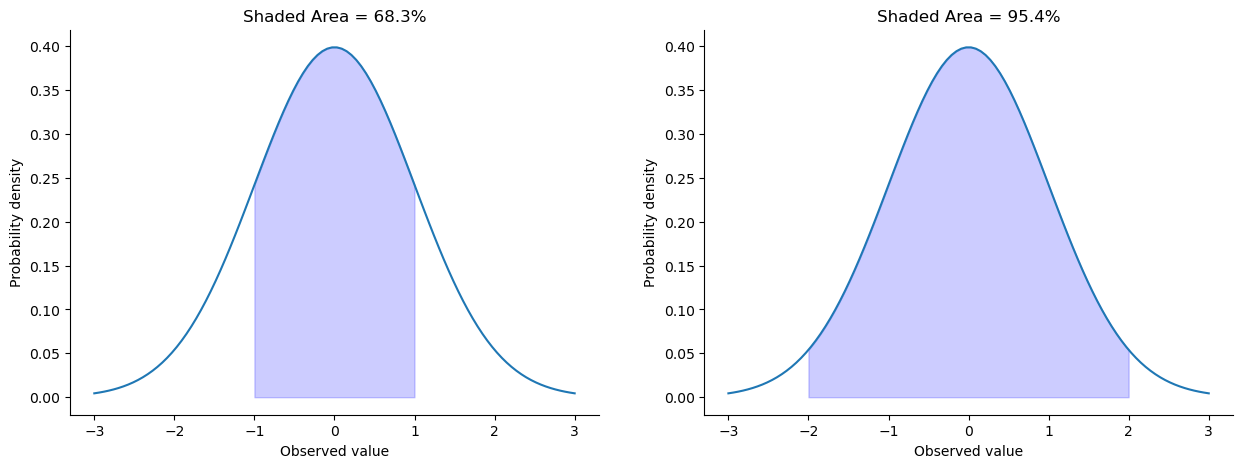

In [21]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[0])


sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[1])


x_fill1 = np.arange(-1, 1, 0.001)
x_fill2 = np.arange(-2, 2, 0.001)

y_fill1 = stats.norm.pdf(x_fill1,0,1)
y_fill2 = stats.norm.pdf(x_fill2,0,1)

axes[0].fill_between(x_fill1,y_fill1,0, alpha=0.2, color='blue')
axes[1].fill_between(x_fill2,y_fill2,0, alpha=0.2, color='blue')

axes[0].set_title("Shaded Area = 68.3%")
axes[1].set_title("Shaded Area = 95.4%")

axes[0].set(xlabel='Observed value', ylabel='Probability density')
axes[1].set(xlabel='Observed value', ylabel='Probability density')

sns.despine()

C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

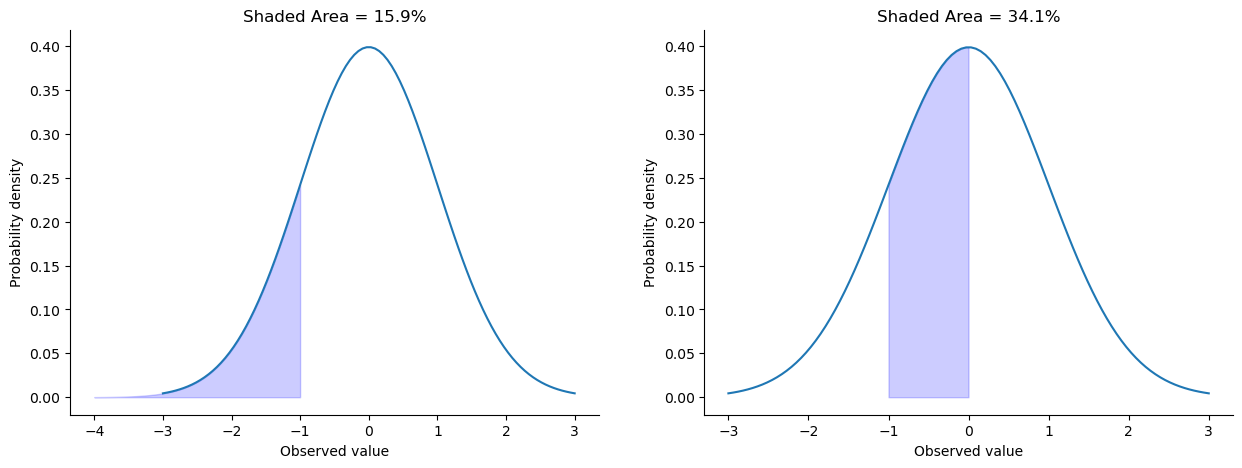

In [22]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[0])


sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[1])


x_fill1 = np.arange(-4, -1, 0.001)
x_fill2 = np.arange(-1, 0, 0.001)

y_fill1 = stats.norm.pdf(x_fill1,0,1)
y_fill2 = stats.norm.pdf(x_fill2,0,1)

axes[0].fill_between(x_fill1,y_fill1,0, alpha=0.2, color='blue')
axes[1].fill_between(x_fill2,y_fill2,0, alpha=0.2, color='blue')

axes[0].set_title("Shaded Area = 15.9%")
axes[1].set_title("Shaded Area = 34.1%")

axes[0].set(xlabel='Observed value', ylabel='Probability density')
axes[1].set(xlabel='Observed value', ylabel='Probability density')

sns.despine()

In [23]:
stats.norm.pdf(1,1,0.1)

3.989422804014327

C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

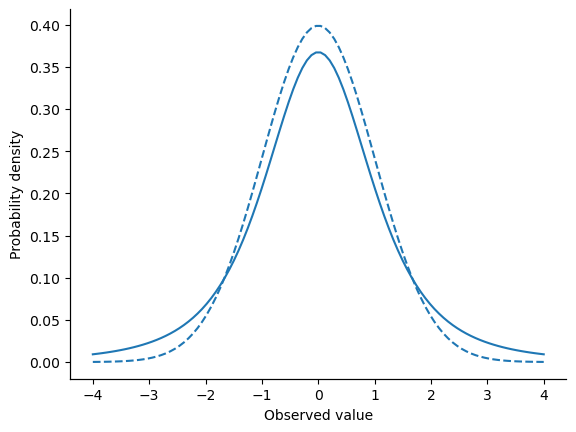

In [24]:
import numpy as np
import scipy.stats as stats
import seaborn as sns


mu = 0
variance = 1
sigma = np.sqrt(variance)
degfree = 3
x = np.linspace(-4, 4, 100)

y1 = stats.norm.pdf(x, mu, sigma)

y2 = stats.t.pdf(x, degfree)


fig = sns.lineplot(x = x, y = y1, linestyle='--')
ax2 = fig.twiny()
ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                   right=False, labelright=False, bottom=False, labelbottom=False)

sns.lineplot(x = x, y = y2, ax=ax2)
fig.set(xlabel='Observed value', ylabel='Probability density')

sns.despine()

C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


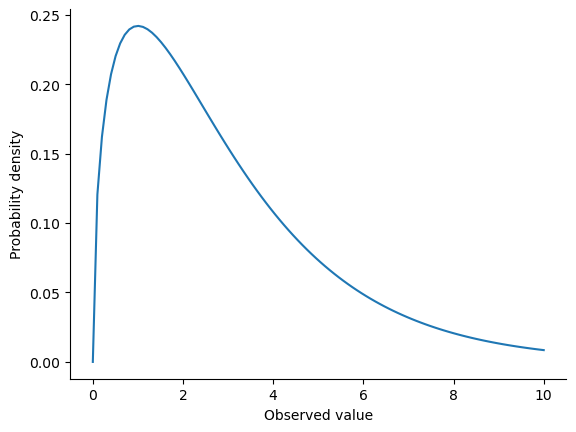

In [25]:
import numpy as np
import scipy.stats as stats
import seaborn as sns


degfree = 3
x = np.linspace(0, 10, 100)

y = stats.chi2.pdf(x, degfree)

fig = sns.lineplot(x = x, y = y)
fig.set(xlabel='Observed value', ylabel='Probability density')

sns.despine()

C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A7279\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


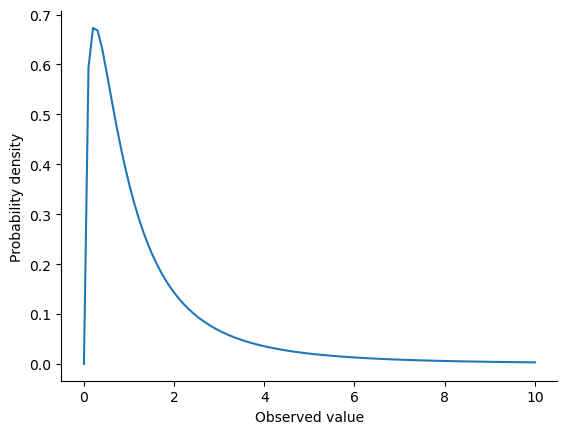

In [26]:
import numpy as np
import scipy.stats as stats
import seaborn as sns


degfree1 = 3
degfree2 = 5
x = np.linspace(0, 10, 100)

y = stats.f.pdf(x, degfree1, degfree2)


fig = sns.lineplot(x = x, y = y)
fig.set(xlabel='Observed value', ylabel='Probability density')

sns.despine()

In [27]:
import numpy as np

mu = 0 
sigma = 1
n = 1000
dist = np.random.normal(mu, sigma, n)

# inspect the first 10 samples
print(dist[0:10])

[ 0.48378835  0.6762164   0.64316328  0.24908671 -1.3957635   1.39166291
 -1.37066901  0.23856319  0.61407709 -0.83791227]
